Extraction and renaming completed: C:\Users\eliri\Downloads\Netflix_shows_movies
Missing values before handling:
 show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64
missing values addressed: C:\Users\eliri\Downloads\Netflix_shows_movies.csv

 first 5 rows of the cleaned nextflix dataset: {final_csv_path }
    show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                   Unknow

C:\Users\eliri\AppData\Local\Temp\ipykernel_100596\975456212.py:125: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")


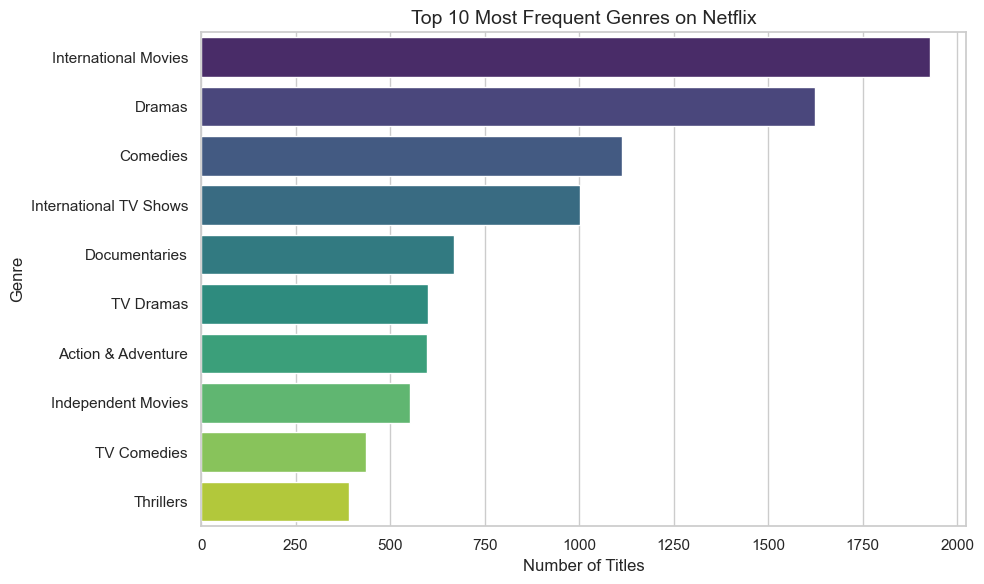

C:\Users\eliri\AppData\Local\Temp\ipykernel_100596\975456212.py:138: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index, palette="rocket")


<Figure size 640x480 with 0 Axes>

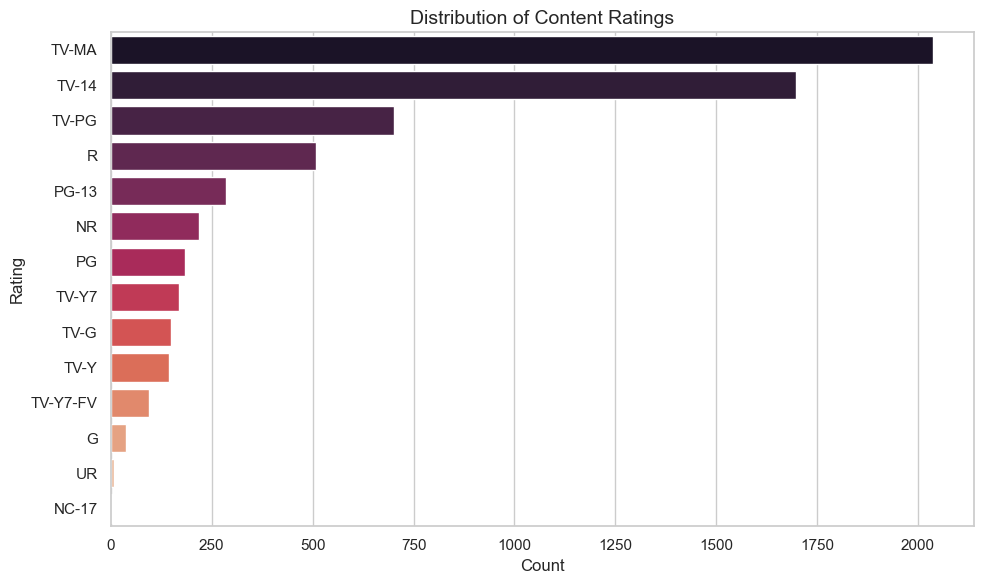

In [32]:
import zipfile
import os
import shutil
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Define the zip file path and the extraction directory
zip_path = r"C:\Users\eliri\Downloads\netflix_data_zip.zip"
extract_to = r"C:\Users\eliri\Downloads\temp_netflix_extract"
final_csv_path = r"C:\Users\eliri\Downloads\Netflix_shows_movies.csv"

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

# Get the list of extracted items
extracted_items = os.listdir(extract_to)

# Rename the first extracted item to "Netflix_shows_movies"
original_item_path = os.path.join(extract_to, extracted_items[0])
new_item_path = os.path.join(os.path.dirname(zip_path), "Netflix_shows_movies")

# Rename the file or folder
shutil.move(original_item_path, new_item_path)

# Optionally remove the temporary extraction directory if it's empty
os.rmdir(extract_to)

print(f"Extraction and renaming completed: {new_item_path}")

# Step 4: Load the CSV with pandas
df = pd.read_csv(r"C:\Users\eliri\Downloads\Netflix_shows_movies")

# Step 5: Display summary of missing values
print("Missing values before handling:\n", df.isnull().sum())

# Fill missing values with context-appropriate replacements

df['director']= df['director'].fillna('Unknown')
df['cast']= df['cast'].fillna('Not Available')
df['country']= df['country'].fillna('Unknown')

# For 'date_added' and 'rating', use the most frequent (mode) values
if df['date_added'].isnull().sum() > 0:
    df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])

if df['rating'].isnull().sum() > 0:
    df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

# Save the cleaned DataFrame to CSV
df.to_csv(final_csv_path, index=False)

print(f"missing values addressed: {final_csv_path }")

# to view the  First few records
print("\n first 5 rows of the cleaned nextflix dataset: {final_csv_path }")
print(df.head(5))

# Shape and column information
print("--------")
print("\n number_of_rows, number_of_columns ")
print("Dataset shape:", df.shape)


print("--------")
print("\n print the data type of each column in Netfilx DataFrame")
print("Column types:\n", df.dtypes)

# Basic statistical summary
print("Summary statistics:\n", df.describe(include='all'))

print("\n Top 5 Countries Producing Netflix Content")
print("--------------------------------------------------")
top_countries = df['country'].value_counts().head(5)
print(top_countries)
print("→ These are the countries with the most Netflix content.\n")

print("\n Release Year Distribution")
print("--------------------------------------------------")
year_distribution = df['release_year'].value_counts().sort_index()
print(year_distribution.tail(10))  # Show last 10 years
print("→ This shows how Netflix content is distributed over time.\n")

print("\n Duration Statistics by Content Type")
print("--------------------------------------------------")
df['duration_num'] = df['duration'].str.extract(r'(\d+)').astype(float)
print(df.groupby('type')['duration_num'].describe())
print("→ TV shows are typically described by number of seasons; movies by minutes.\n")

print("\n Most Common Genres/Categories")
print("--------------------------------------------------")
print(df['listed_in'].value_counts().head(5))
print("→ These are the most frequently listed categories.\n")

print("\n Top 5 Directors")
print("--------------------------------------------------")
print(df['director'].value_counts().head(5))
print("→ These directors have the highest number of works on Netflix.\n")

print("\n Top 5 Actors/Actresses")
print("--------------------------------------------------")
#cast_series = df['cast'].dropna().str.split(', ')
#all_actors = [actor for sublist in cast_series for actor in sublist]
top_actors = Counter(all_actors).most_common(5)
for actor, count in top_actors:
    print(f"{actor}: {count}")
print("→ These actors appear most frequently across titles.\n")

# Set Seaborn style
sns.set(style="whitegrid")

# ----------------------------------------------
# 🎭 1. Most Watched Genres
# ----------------------------------------------

# Count genre frequency
genre_series = df['listed_in'].str.split(', ')
all_genres = [genre.strip() for sublist in genre_series.dropna() for genre in sublist]
genre_counts = pd.Series(all_genres).value_counts().head(10)

# Plot the top 10 genres
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")
plt.title("Top 10 Most Frequent Genres on Netflix", fontsize=14)
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()
plt.savefig("top_genres.png")  # ← Save the plot

# ----------------------------------------------
# 2. Distribution of Ratings
# ----------------------------------------------

plt.figure(figsize=(10, 6))
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index, palette="rocket")
plt.title("Distribution of Content Ratings", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Rating")
plt.tight_layout()
plt.show()

genre_counts.to_csv("C:/Users/eliri/Downloads/genre_counts.csv", header=True)